# EXOGENEOUS VARIABLE FORECASTING

In [16]:
import pandas as pd
import numpy as np
from statsmodels.tsa.statespace.sarimax import SARIMAX
from pandas.tseries.offsets import DateOffset

In [17]:
df = pd.read_excel('/Users/muskaan/Documents/ARIMA/Walmart_Revenue_raw_data1.xlsx')

In [18]:
import pandas as pd
import numpy as np
from statsmodels.tsa.statespace.sarimax import SARIMAX
from pandas.tseries.offsets import DateOffset



# Combine 'Quarter' and 'Year' to create a datetime index
df['Date'] = df['Year'].astype(str) + ' ' + df['Quarter']
df['Date'] = pd.to_datetime(df['Date'].str.replace('Q1', '01').str.replace('Q2', '04').str.replace('Q3', '07').str.replace('Q4', '10'))
df.set_index('Date', inplace=True)

# Drop the original Quarter and Year columns
df.drop(columns=['Quarter', 'Year'], inplace=True)

# Remove the target variable (Walmart revenue)
df_exog = df.drop(columns=['Walmart Revenue in $ Million'])

# Step 1: Handle missing values
# Check for missing values
print("Missing values in the dataset before handling:\n", df_exog.isnull().sum())

# Fill missing values using forward fill method (choose an appropriate method if necessary)
df_exog.fillna(method='ffill', inplace=True)

# Check for missing values again
print("Missing values in the dataset after handling:\n", df_exog.isnull().sum())

# Step 2: Fit ARIMA Models
def fit_arima_and_forecast(series, steps):
    # Fit the ARIMA model
    model = SARIMAX(series, order=(1, 1, 1), seasonal_order=(1, 1, 1, 4), enforce_stationarity=False, enforce_invertibility=False)
    results = model.fit(disp=False)
    print(f"Fitting results for {series.name}:\n", results.summary())
    # Forecast
    forecast = results.get_forecast(steps=steps).predicted_mean
    forecast.index = pd.date_range(start='2023-07-01', periods=steps, freq='QS')
    print(f"Forecast for {series.name}:\n", forecast)
    return forecast

# Define the forecast horizon (Q3 2023 to Q4 2024)
forecast_start_date = '2023-07-01'
forecast_end_date = '2024-12-31'
forecast_dates = pd.date_range(start=forecast_start_date, end=forecast_end_date, freq='QS')
print("Forecast Dates:\n", forecast_dates)

# Initialize a dictionary to store forecasts
forecasts = {}

# List of exogenous variables
variables = ['GDP in $ Billion', 'Percentage of Inflation', 'Unemployment rate in %', 'Consumer Price Index', 
             'Industrial Production', 'House Price Index', 'National Income in Billion']

# Fit and forecast each exogenous variable
for var in variables:
    forecast = fit_arima_and_forecast(df_exog[var], len(forecast_dates))
    forecasts[var] = forecast

# Step 3: Generate Forecasts for Each Exogenous Variable
# Create a DataFrame to store all forecasts with correct dates
forecast_df = pd.DataFrame(forecasts, index=forecast_dates)

# Display the forecasted data
print(forecast_df.head())
print(forecast_df)


Missing values in the dataset before handling:
 GDP in $ Billion              6
Percentage of Inflation       6
Unemployment rate in %        6
Consumer Price Index          6
Industrial Production         6
House Price Index             6
National Income in Billion    6
dtype: int64
Missing values in the dataset after handling:
 GDP in $ Billion              0
Percentage of Inflation       0
Unemployment rate in %        0
Consumer Price Index          0
Industrial Production         0
House Price Index             0
National Income in Billion    0
dtype: int64
Forecast Dates:
 DatetimeIndex(['2023-07-01', '2023-10-01', '2024-01-01', '2024-04-01',
               '2024-07-01', '2024-10-01'],
              dtype='datetime64[ns]', freq='QS-JAN')
Fitting results for GDP in $ Billion:
                                      SARIMAX Results                                     
Dep. Variable:                  GDP in $ Billion   No. Observations:                   64
Model:             SARIMAX(

/Users/muskaan/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)
/Users/muskaan/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)
/Users/muskaan/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)
/Users/muskaan/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)
/Users/muskaan/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No freque

Fitting results for Consumer Price Index:
                                      SARIMAX Results                                     
Dep. Variable:              Consumer Price Index   No. Observations:                   64
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 4)   Log Likelihood                 -91.803
Date:                           Thu, 22 Aug 2024   AIC                            193.606
Time:                                   17:33:00   BIC                            203.458
Sample:                               01-01-2009   HQIC                           197.395
                                    - 10-01-2024                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.8288      0.099      8.413      0.000       0.636       1.022


/Users/muskaan/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)
/Users/muskaan/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)
/Users/muskaan/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)
/Users/muskaan/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)
/Users/muskaan/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No freque

In [19]:
import pandas as pd
import numpy as np
from statsmodels.tsa.statespace.sarimax import SARIMAX
from pandas.tseries.offsets import DateOffset

# Load the dataset
df = pd.read_excel('/Users/muskaan/Documents/ARIMA/Walmart_Revenue_raw_data1.xlsx')

# Combine 'Quarter' and 'Year' to create a datetime index
df['Date'] = df['Year'].astype(str) + ' ' + df['Quarter']
df['Date'] = pd.to_datetime(df['Date'].str.replace('Q1', '01').str.replace('Q2', '04').str.replace('Q3', '07').str.replace('Q4', '10'))
df.set_index('Date', inplace=True)

# Drop the original Quarter and Year columns
df.drop(columns=['Quarter', 'Year'], inplace=True)

# Remove the target variable from exogenous variables
df_exog = df.drop(columns=['Walmart Revenue in $ Million'])

# Handle missing values
df_exog.fillna(method='ffill', inplace=True)

# Fit ARIMA Models and Forecast
def fit_arima_and_forecast(series, steps):
    model = SARIMAX(series, order=(1, 1, 1), seasonal_order=(1, 1, 1, 4), enforce_stationarity=False, enforce_invertibility=False)
    results = model.fit(disp=False)
    forecast = results.get_forecast(steps=steps).predicted_mean
    forecast.index = pd.date_range(start='2023-07-01', periods=steps, freq='QS')
    return forecast

# Define the forecast horizon
forecast_start_date = '2023-07-01'
forecast_end_date = '2024-12-31'
forecast_dates = pd.date_range(start=forecast_start_date, end=forecast_end_date, freq='QS')

# Initialize forecasts dictionary
forecasts = {}

# List of exogenous variables
variables = ['GDP in $ Billion', 'Percentage of Inflation', 'Unemployment rate in %', 'Consumer Price Index', 
             'Industrial Production', 'House Price Index', 'National Income in Billion']

# Fit and forecast each exogenous variable
for var in variables:
    forecast = fit_arima_and_forecast(df_exog[var], len(forecast_dates))
    forecasts[var] = forecast

# Create a DataFrame to store all forecasts with correct dates
forecast_df = pd.DataFrame(forecasts, index=forecast_dates)

# Recreate the Quarter and Year columns from Date
forecast_df['Quarter'] = forecast_df.index.to_period('Q').strftime('Q%q')
forecast_df['Year'] = forecast_df.index.year

# Ensure the columns are in the correct order
forecast_df = forecast_df.reset_index()
forecast_df = forecast_df.rename(columns={'index': 'Date'})
forecast_df = forecast_df[['Date', 'Quarter', 'Year'] + variables]

# Define the output file path
output_file_path = 'predicted_exogenous_variables.xlsx'

# Export to Excel
forecast_df.to_excel(output_file_path, index=False)

print(f"Predicted exogenous variables have been exported to {output_file_path}")


/Users/muskaan/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)
/Users/muskaan/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)
/Users/muskaan/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)
/Users/muskaan/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)
/Users/muskaan/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No freque

Predicted exogenous variables have been exported to predicted_exogenous_variables.xlsx


/Users/muskaan/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)
/Users/muskaan/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)
/Users/muskaan/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)
/Users/muskaan/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)


# ARIMA

In [20]:
import pandas as pd

# Load the dataset
data=pd.read_excel('/Users/muskaan/Documents/ARIMA/predicted_exogenous_variables.xlsx')

# Convert 'Year' and 'Quarter' to Date format
data['Date'] = data['Year'].astype(str) + ' ' + data['Quarter']
data['Date'] = pd.to_datetime(data['Date'].str.replace('Q1', '01').str.replace('Q2', '04').str.replace('Q3', '07').str.replace('Q4', '10'))
data.set_index('Date', inplace=True)

# Drop 'Year' and 'Quarter' columns
data.drop(columns=['Year', 'Quarter'], inplace=True)

# Define training and test data
train_data = data.loc[data.index <= '2023-06-30'].copy()  # Up to end of Q2 2023
test_data = data.loc[data.index > '2023-06-30'].copy()   # From Q3 2023 onwards


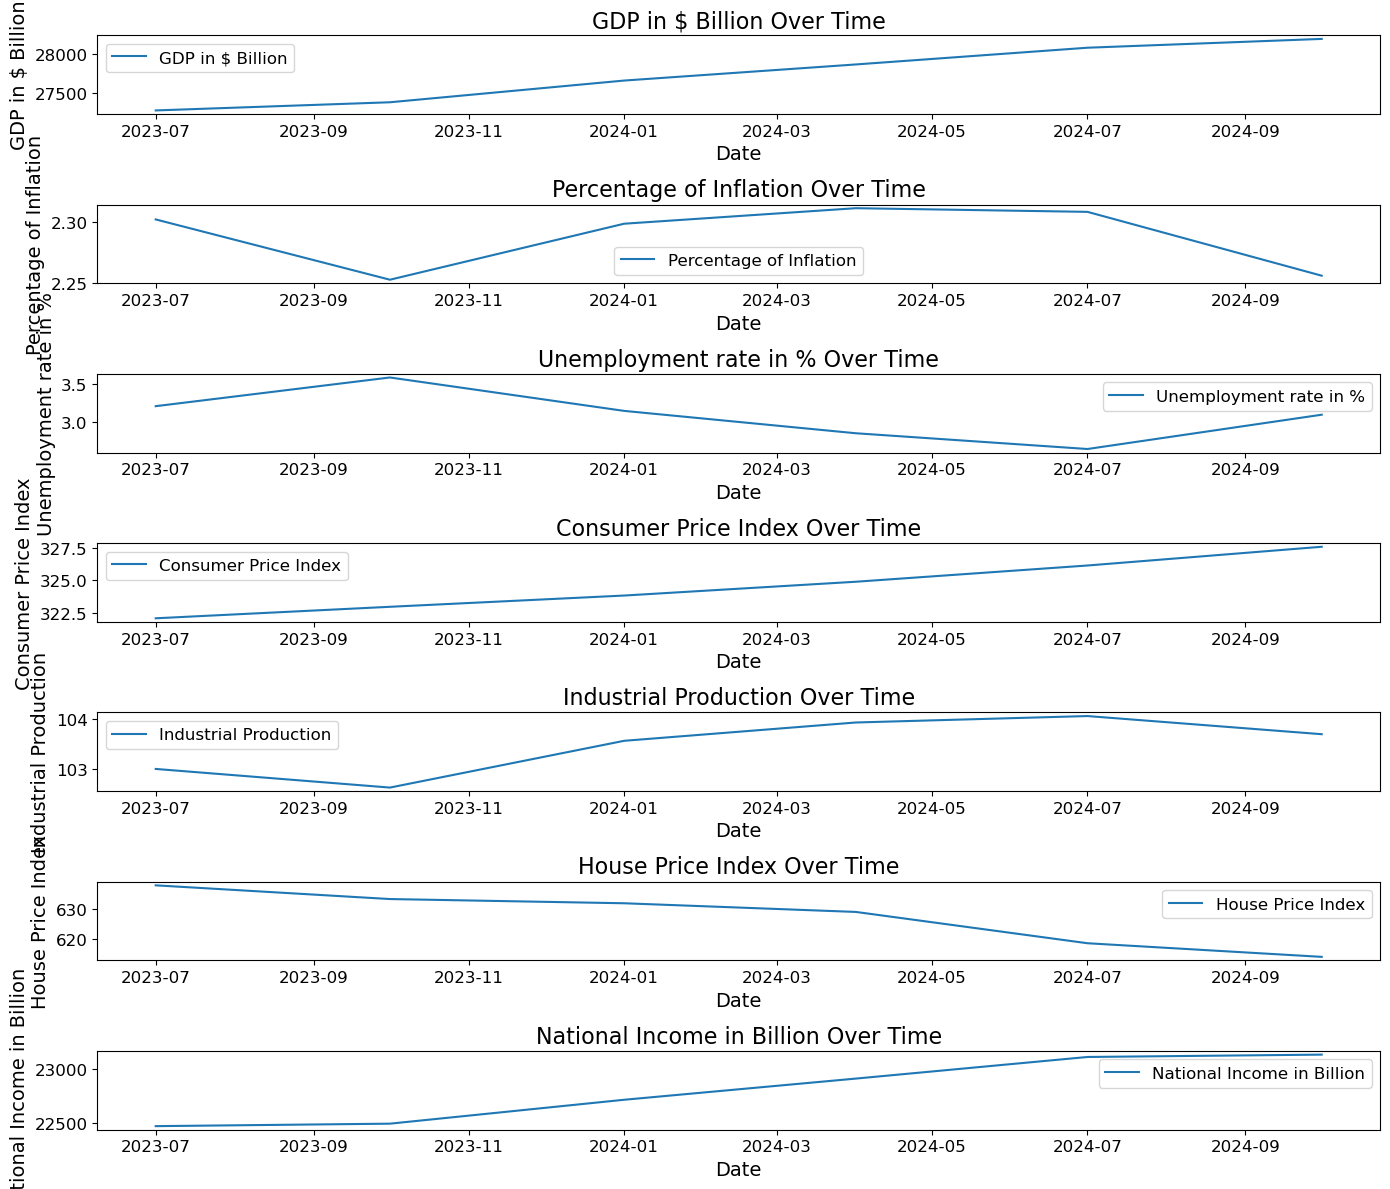

In [21]:
import matplotlib.pyplot as plt

'''# Plot Walmart Revenue
plt.figure(figsize=(12, 6))
plt.plot(data.index, data['Walmart Revenue in $ Million'], label='Walmart Revenue', color='blue')
plt.xlabel('Date', fontsize=14)
plt.ylabel('Walmart Revenue in $ Million', fontsize=14)
plt.title('Walmart Revenue Over Time', fontsize=16)
plt.legend(fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()'''

# Plot Exogenous Variables
exog_columns = ['GDP in $ Billion', 'Percentage of Inflation', 'Unemployment rate in %', 
                'Consumer Price Index', 'Industrial Production', 'House Price Index', 'National Income in Billion']

plt.figure(figsize=(14, 12))
for i, col in enumerate(exog_columns, 1):
    plt.subplot(len(exog_columns), 1, i)
    plt.plot(data.index, data[col], label=col)
    plt.xlabel('Date', fontsize=14)
    plt.ylabel(col, fontsize=14)
    plt.title(f'{col} Over Time', fontsize=16)
    plt.legend(fontsize=12)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()


In [22]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Decompose the time series
decomposition = seasonal_decompose(train_data['Walmart Revenue in $ Million'], model='additive')

# Plot the decomposition
plt.figure(figsize=(12, 8))
plt.subplot(4, 1, 1)
plt.plot(decomposition.observed, label='Observed')
plt.legend(loc='upper left')

plt.subplot(4, 1, 2)
plt.plot(decomposition.trend, label='Trend')
plt.legend(loc='upper left')

plt.subplot(4, 1, 3)
plt.plot(decomposition.seasonal, label='Seasonal')
plt.legend(loc='upper left')

plt.subplot(4, 1, 4)
plt.plot(decomposition.resid, label='Residual')
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()


KeyError: 'Walmart Revenue in $ Million'

In [23]:
# Calculate correlations between Walmart Revenue and exogenous variables
correlations = train_data.corr()['Walmart Revenue in $ Million']
print(correlations)


KeyError: 'Walmart Revenue in $ Million'

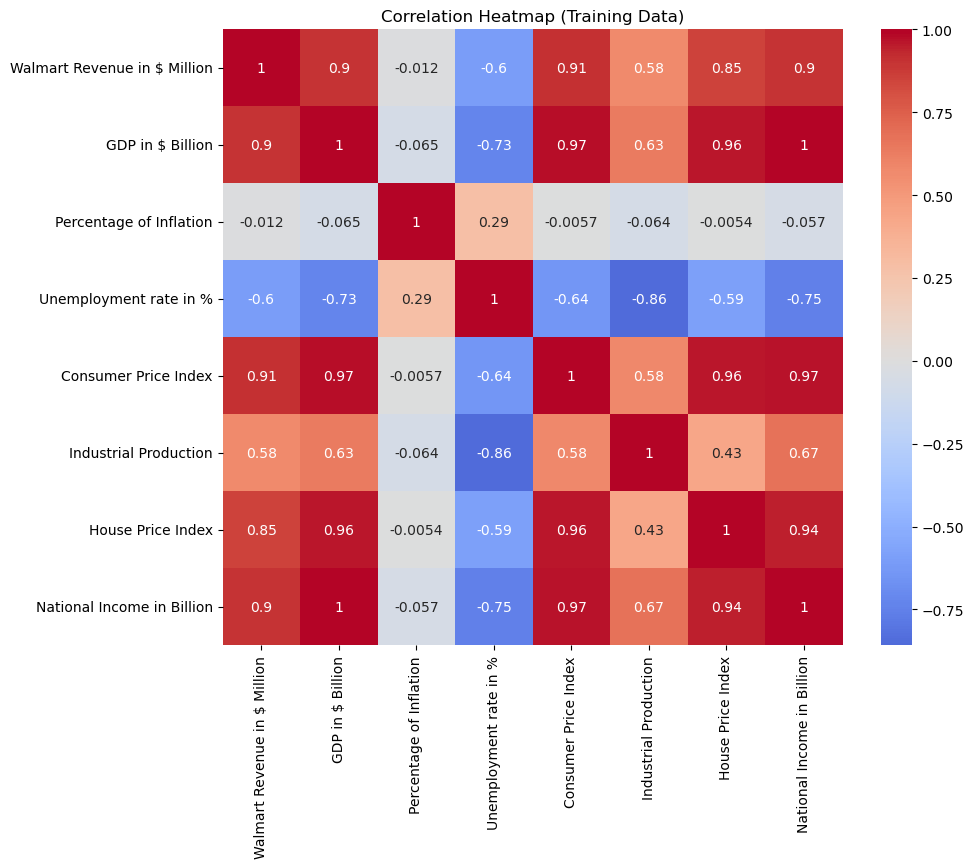

In [76]:
import seaborn as sns

plt.figure(figsize=(10, 8))
correlation_matrix = train_data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap (Training Data)')
plt.show()


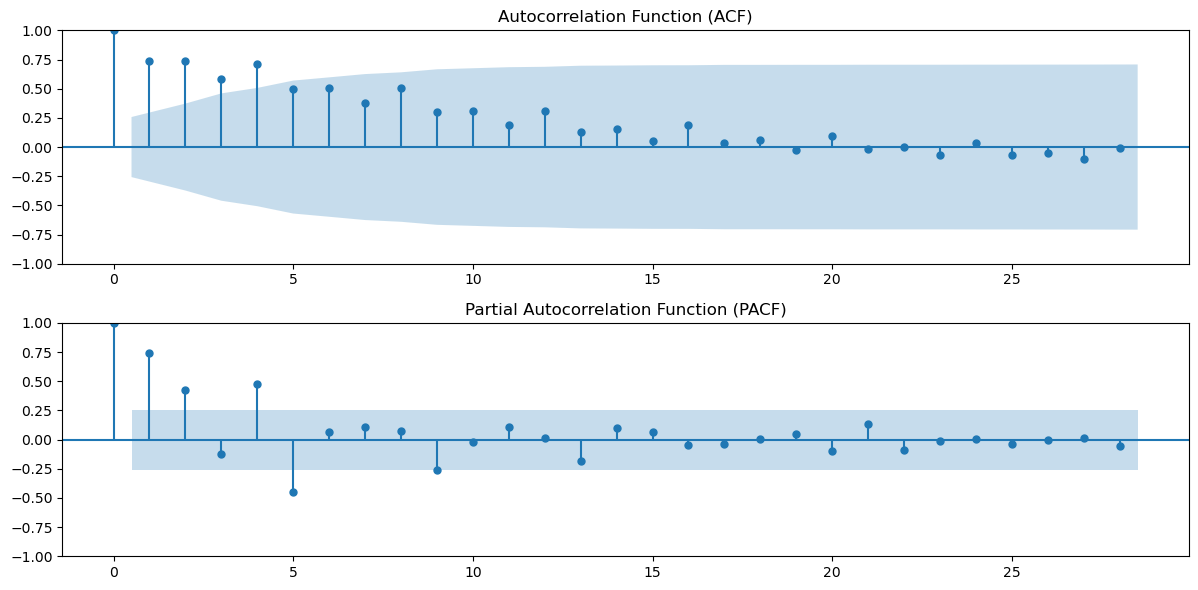

In [77]:
import pandas as pd
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt

# Drop the column with negligible impact
train_data_cleaned = train_data.drop(columns=['Percentage of Inflation'])

# Define the number of lags
max_lags = 28

# Plot ACF and PACF
plt.figure(figsize=(12, 6))

# ACF plot
plt.subplot(2, 1, 1)
plot_acf(train_data_cleaned['Walmart Revenue in $ Million'].dropna(), lags=max_lags, ax=plt.gca())
plt.title('Autocorrelation Function (ACF)')

# PACF plot
plt.subplot(2, 1, 2)
plot_pacf(train_data_cleaned['Walmart Revenue in $ Million'].dropna(), lags=max_lags, ax=plt.gca())
plt.title('Partial Autocorrelation Function (PACF)')

plt.tight_layout()
plt.show()


In [78]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(train_data_cleaned['Walmart Revenue in $ Million'].dropna())
print('ADF Statistic:', result[0])
print('p-value:', result[1])


ADF Statistic: 1.5848681873480408
p-value: 0.9978114614359337


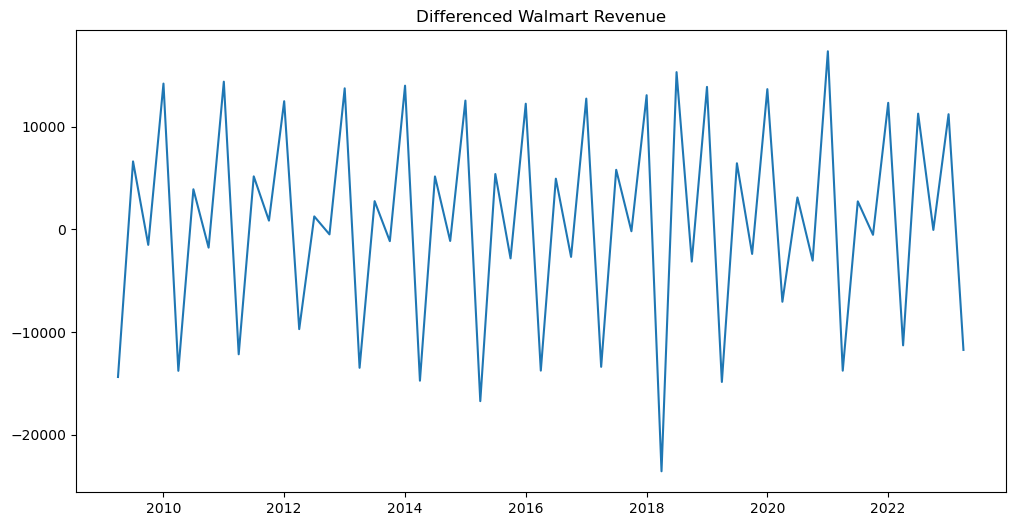

ADF Statistic (Differenced): -3.5856698643228566
p-value (Differenced): 0.006040973533704045


In [79]:
# Apply differencing
train_data_cleaned['Walmart Revenue Diff'] = train_data_cleaned['Walmart Revenue in $ Million'].diff().dropna()

# Plot the differenced series
plt.figure(figsize=(12, 6))
plt.plot(train_data_cleaned['Walmart Revenue Diff'])
plt.title('Differenced Walmart Revenue')
plt.show()

# Re-run ADF test on differenced data
result_diff = adfuller(train_data_cleaned['Walmart Revenue Diff'].dropna())
print('ADF Statistic (Differenced):', result_diff[0])
print('p-value (Differenced):', result_diff[1])


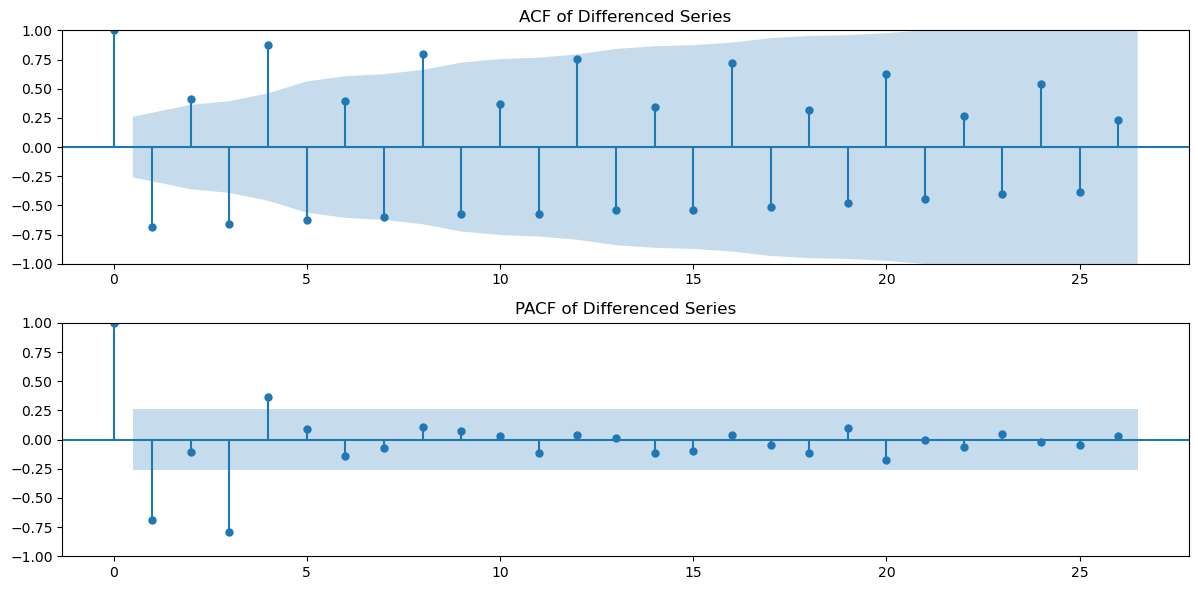

In [80]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt

# Set the number of lags to be less than half the number of observations
max_lags = 26

plt.figure(figsize=(12, 6))

# ACF plot
plt.subplot(2, 1, 1)
plot_acf(train_data_cleaned['Walmart Revenue Diff'].dropna(), lags=max_lags, ax=plt.gca())
plt.title('ACF of Differenced Series')

# PACF plot
plt.subplot(2, 1, 2)
plot_pacf(train_data_cleaned['Walmart Revenue Diff'].dropna(), lags=max_lags, ax=plt.gca())
plt.title('PACF of Differenced Series')

plt.tight_layout()
plt.show()


In [81]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Define the endogenous and exogenous variables excluding 'Percentage of Inflation'
endog = train_data['Walmart Revenue in $ Million']
exog = train_data[['GDP in $ Billion', 'Unemployment rate in %', 
                   'Consumer Price Index', 'Industrial Production', 
                   'House Price Index', 'National Income in Billion']]

# Fit the SARIMAX model
model = SARIMAX(endog, exog=exog, order=(1, 1, 0), seasonal_order=(0, 1, 0, 4))  # Adjust seasonal_order if needed
fitted_model = model.fit()

# Print model summary
print(fitted_model.summary())


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.56204D+00    |proj g|=  3.18272D-02

At iterate    5    f=  8.55911D+00    |proj g|=  1.21444D-02

At iterate   10    f=  8.54776D+00    |proj g|=  3.80629D-04

At iterate   15    f=  8.54759D+00    |proj g|=  3.87271D-03

At iterate   20    f=  8.54293D+00    |proj g|=  5.21368D-03

At iterate   25    f=  8.54223D+00    |proj g|=  4.79224D-05

At iterate   30    f=  8.54223D+00    |proj g|=  1.11157D-03

At iterate   35    f=  8.54183D+00    |proj g|=  9.40843D-03

At iterate   40    f=  8.54110D+00    |proj g|=  2.68609D-04

At iterate   45    f=  8.54109D+00    |proj g|=  3.76086D-04

At iterate   50    f=  8.54108D+00    |proj g|=  5.82149D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

/Users/muskaan/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)
/Users/muskaan/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.
/Users/muskaan/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


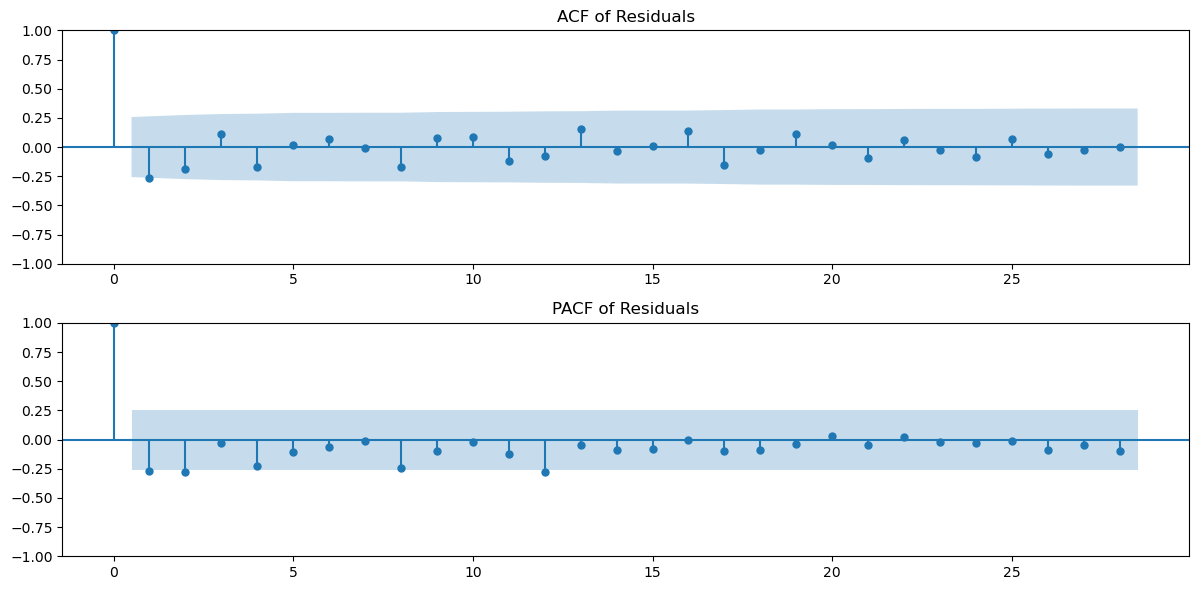

In [82]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt

# Set the number of lags to be less than half the number of observations
max_lags = 28  # or any value less than 28

plt.figure(figsize=(12, 6))

# ACF plot for residuals
plt.subplot(2, 1, 1)
plot_acf(residuals, lags=max_lags, ax=plt.gca())
plt.title('ACF of Residuals')

# PACF plot for residuals
plt.subplot(2, 1, 2)
plot_pacf(residuals, lags=max_lags, ax=plt.gca())
plt.title('PACF of Residuals')

plt.tight_layout()
plt.show()


In [83]:
# Prepare your test data
future_dates = pd.date_range(start='2023-07-01', periods=6, freq='Q')

# Example test data without 'Percentage of Inflation'
future_exog = pd.DataFrame({
    'GDP in $ Billion': [27281.155352, 27384.932928, 27660.794366, 27865.440236, 28078.060003, 28190.043578],
    'Unemployment rate in %': [3.204364, 3.585648, 3.141664, 2.844526, 2.635215, 3.090937],
    'Consumer Price Index': [322.067281, 322.955574, 323.825185, 324.891861, 326.146975, 327.594617],
    'Industrial Production': [103.003748, 102.632720, 103.564001, 103.928768, 104.056983, 103.695509],
    'House Price Index': [637.863078, 633.311222, 631.912238, 629.036196, 618.641591, 614.120618],
    'National Income in Billion': [22467.450895, 22490.455085, 22712.711125, 22909.591304, 23110.496546, 23132.354910]
}, index=future_dates)

# Forecasting with the updated model
forecast = fitted_model.get_forecast(steps=6, exog=future_exog)

# Extract the forecasted mean and confidence intervals
forecast_mean = forecast.predicted_mean
forecast_conf_int = forecast.conf_int()

# Display the forecasted values
print("Forecasted Values:")
print(forecast_mean)

print("\nForecast Confidence Intervals:")
print(forecast_conf_int)


Forecasted Values:
2023-07-01    161934.558714
2023-10-01    160952.976003
2024-01-01    171859.131431
2024-04-01    162518.269269
2024-07-01    172919.597973
2024-10-01    172220.772711
Freq: QS-OCT, Name: predicted_mean, dtype: float64

Forecast Confidence Intervals:
            lower Walmart Revenue in $ Million  \
2023-07-01                       156395.129377   
2023-10-01                       154728.958813   
2024-01-01                       164375.428286   
2024-04-01                       154251.131044   
2024-07-01                       160427.172381   
2024-10-01                       158133.337035   

            upper Walmart Revenue in $ Million  
2023-07-01                       167473.988052  
2023-10-01                       167176.993193  
2024-01-01                       179342.834577  
2024-04-01                       170785.407493  
2024-07-01                       185412.023564  
2024-10-01                       186308.208387  


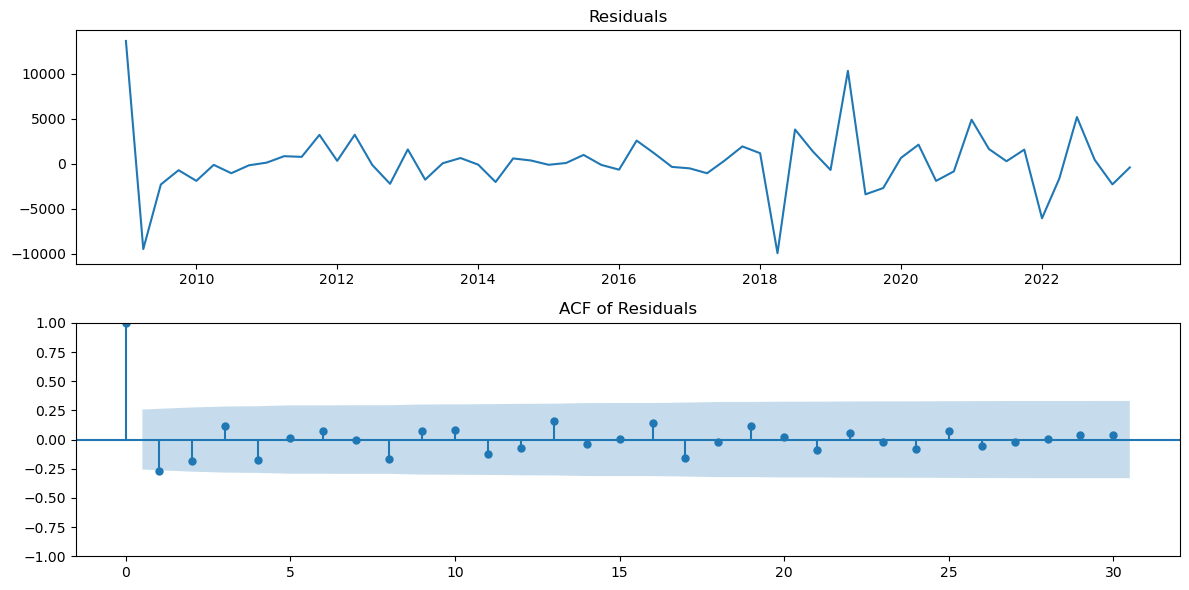

Ljung-Box Test:
      lb_stat  lb_pvalue
10  12.371021   0.260992


In [84]:
# Compute residuals
residuals = train_data['Walmart Revenue in $ Million'] - fitted_model.fittedvalues

# Plot residuals
plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
plt.plot(residuals)
plt.title('Residuals')

# ACF of residuals
plt.subplot(2, 1, 2)
plot_acf(residuals, lags=30, ax=plt.gca())
plt.title('ACF of Residuals')

plt.tight_layout()
plt.show()

# Ljung-Box test
from statsmodels.stats.diagnostic import acorr_ljungbox
lb_test = acorr_ljungbox(residuals, lags=[10], return_df=True)
print("Ljung-Box Test:")
print(lb_test)


In [108]:
import pandas as pd
from pmdarima import auto_arima
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
from math import sqrt
import matplotlib.pyplot as plt

# Step 1: Load the dataset
data_arima_test = pd.read_excel('/Users/muskaan/Documents/ARIMA/predicted_exogenous_variables.xlsx')

# Step 2: Convert 'Year' and 'Quarter' to Date format
data_arima_test['Date'] = data_arima_test['Year'].astype(str) + ' ' + data_arima_test['Quarter']
data_arima_test['Date'] = pd.to_datetime(data_arima_test['Date'].str.replace('Q1', '01').str.replace('Q2', '04').str.replace('Q3', '07').str.replace('Q4', '10'))
data_arima_test.set_index('Date', inplace=True)

# Drop the original 'Quarter' and 'Year' columns
data_arima_test.drop(columns=['Quarter', 'Year'], inplace=True)

# Step 3: Scale the Exogenous Variables
exog_vars = ['GDP in $ Billion', 'Percentage of Inflation', 'Unemployment rate in %', 
             'Consumer Price Index', 'Industrial Production', 'House Price Index', 'National Income in Billion']
target_var = 'Walmart Revenue in $ Million'

# Initialize the scaler and fit-transform on exogenous variables
scaler = StandardScaler()
data_arima_test[exog_vars] = scaler.fit_transform(data_arima_test[exog_vars])

# Step 4: Define the AutoARIMA function
def auto_arima_model(data_frame, output_parameter, exogenous_variables):
    """
    Perform AutoARIMA modeling on the given DataFrame.

    Parameters:
    - data_frame (pd.DataFrame): The input DataFrame containing time series data.
    - output_parameter (str): The name of the column to be predicted.
    - exogenous_variables (list): List of column names for exogenous variables.

    Returns:
    - predicted_values: Predicted values for the forecast horizon.
    - test_rmse: Root Mean Squared Error on the test set.
    - test_mae: Mean Absolute Error on the test set.
    - test_mape: Mean Absolute Percentage Error on the test set.
    """

    # Extract the relevant columns from the DataFrame
    df = data_frame[[output_parameter] + exogenous_variables].copy()

    # First Model Instance for Accuracy metrics
    # Split the data into training and testing sets
    exog_train = df[df.index <= '2022-06-01']
    exog_test = df[(df.index > '2022-06-01') & (df.index <= '2023-06-01')]

    # Perform AutoARIMA model selection
    model = auto_arima(y=exog_train[output_parameter],
                       X=exog_train[exogenous_variables],
                       seasonal=True,
                       suppress_warnings=True,
                       stepwise=True,
                       m=4,  # Assuming quarterly data with a seasonality of 4
                       max_p=5,  # Maximum number of autoregressive terms
                       max_q=5,  # Maximum number of moving average terms
                       d=1,
                       max_order=None  # Maximum order of differencing
                       )
    print(model.summary())
    model.fit(exog_train[output_parameter], X=exog_train[exogenous_variables])
    
    # Make predictions on the test set
    forecast, conf_int = model.predict(n_periods=len(exog_test), X=exog_test[exogenous_variables], return_conf_int=True)

    # Calculate metrics on the test set
    test_rmse = sqrt(mean_squared_error(exog_test[output_parameter], forecast))
    test_mae = mean_absolute_error(exog_test[output_parameter], forecast)
    test_mape = mean_absolute_percentage_error(exog_test[output_parameter], forecast) * 100

    # Second Model Instance for Prediction
    # Split the data into training and testing sets
    exog_train = df[df.index <= '2023-06-01']
    exog_test = df[df.index > '2023-06-01']

    # Perform AutoARIMA model selection
    model = auto_arima(y=exog_train[output_parameter],
                       X=exog_train[exogenous_variables],
                       seasonal=True,
                       suppress_warnings=True,
                       stepwise=True,
                       m=4,  # Assuming quarterly data with a seasonality of 4
                       max_p=5,  # Maximum number of autoregressive terms
                       max_q=5,  # Maximum number of moving average terms
                       d=1,
                       max_order=None  # Maximum order of differencing
                       )
    print(model.summary())
    model.fit(exog_train[output_parameter], X=exog_train[exogenous_variables])
    
    # Make predictions on the test set
    forecast, conf_int = model.predict(n_periods=len(exog_test), X=exog_test[exogenous_variables], return_conf_int=True)
    predicted_values = pd.Series(forecast, index=exog_test.index, name='Predicted')
    
    return predicted_values, test_rmse, test_mae, test_mape

# Step 5: Apply the AutoARIMA model
predicted_values, test_rmse, test_mae, test_mape = auto_arima_model(data_arima_test, target_var, exog_vars)

# Display the results
print(f"Test RMSE: {test_rmse}")
print(f"Test MAE: {test_mae}")
print(f"Test MAPE: {test_mape}%")



                                     SARIMAX Results                                     
Dep. Variable:                                 y   No. Observations:                   54
Model:             SARIMAX(0, 1, 0)x(0, 1, 0, 4)   Log Likelihood                -464.293
Date:                           Thu, 15 Aug 2024   AIC                            944.587
Time:                                   22:55:44   BIC                            959.721
Sample:                               01-01-2009   HQIC                           950.329
                                    - 04-01-2022                                         
Covariance Type:                             opg                                         
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
GDP in $ Billion            1676.6181   1.74e+04      0.097      0.923   -3.23e+04    3.57

# LSTM

In [88]:
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error

# Load data
data_nn = pd.read_excel('/Users/muskaan/Documents/ARIMA/predicted_exogenous_variables.xlsx')

# Drop the Percentage of Inflation column
data_nn.drop(columns=['Percentage of Inflation'], inplace=True)

# Convert 'Year' and 'Quarter' to Date format
data_nn['Date'] = data_nn['Year'].astype(str) + ' ' + data_nn['Quarter']
data_nn['Date'] = pd.to_datetime(data_nn['Date'].str.replace('Q1', '01')
                                                  .str.replace('Q2', '04')
                                                  .str.replace('Q3', '07')
                                                  .str.replace('Q4', '10'))
data_nn.set_index('Date', inplace=True)

# Drop the original 'Quarter' and 'Year' columns
data_nn.drop(columns=['Quarter', 'Year'], inplace=True)

# Identify exogenous and target variables
exog_vars = ['GDP in $ Billion', 'Unemployment rate in %', 'Consumer Price Index', 
             'Industrial Production', 'House Price Index', 'National Income in Billion']
target_var = 'Walmart Revenue in $ Million'

# Scale Exogenous and Target Variables
scaler_exog = StandardScaler()
data_nn[exog_vars] = scaler_exog.fit_transform(data_nn[exog_vars])

scaler_target = MinMaxScaler()
data_nn[[target_var]] = scaler_target.fit_transform(data_nn[[target_var]])

# Function to create sequences for LSTM
def create_lstm_sequences(data_nn, target_var, exog_vars, look_back):
    sequences = []
    targets = []
    for i in range(len(data_nn) - look_back):
        seq = data_nn.iloc[i:(i + look_back)][exog_vars].values
        target = data_nn.iloc[i + look_back][target_var]
        if not np.isnan(target):  # Exclude sequences where the target is NaN
            sequences.append(seq)
            targets.append(target)
    return np.array(sequences), np.array(targets)

# Create LSTM-Compatible Data
look_back = 4  # Example window size, adjust as per your data and experimentation

# Create sequences and targets for LSTM
X, y = create_lstm_sequences(data_nn, target_var, exog_vars, look_back)

# Split into train and validation sets (excluding last 6 rows for evaluation)
split = len(X) - 6  # Use all but last 6 for training and validation
X_train, X_valid = X[:split], X[split:]
y_train, y_valid = y[:split], y[split:]

# Convert data to PyTorch tensors
X_train = torch.tensor(X_train, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.float32).view(-1, 1)
X_valid = torch.tensor(X_valid, dtype=torch.float32)
y_valid = torch.tensor(y_valid, dtype=torch.float32).view(-1, 1)

# Define LSTM model class
class LSTMNet(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, dropout_rate=0.5):
        super(LSTMNet, self).__init__()
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.num_layers = num_layers
        
        self.lstm = nn.LSTM(
            input_size=input_size, hidden_size=hidden_size,
            num_layers=num_layers, batch_first=True, dropout=dropout_rate
        )
        
        self.fc1 = nn.Linear(hidden_size, 40)
        self.fc2 = nn.Linear(40, 1)
        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(dropout_rate)
        
    def forward(self, x):
        h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(x.device)
        c0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(x.device)
        _, (h_out, _) = self.lstm(x, (h0, c0))
        
        h_out = h_out[-1]  # Use the output of the last timestep
        out = self.fc2(self.relu(self.fc1(self.dropout(h_out))))
        
        return out

# Training function for a single model
def train_lstm_model(model, X_train, y_train, X_valid, y_valid, learning_rate=0.008, epochs=2000):
    model.to(DEVICE)
    criterion = nn.MSELoss()
    optimizer = optim.Adam(model.parameters(), lr=learning_rate)
    scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', patience=50, factor=0.5, verbose=True)
    
    early_stopping_patience = 150
    early_stopping_counter = 0
    valid_loss_min = np.inf
    
    for epoch in range(epochs):
        model.train()
        optimizer.zero_grad()
        output = model(X_train)
    
        train_loss = criterion(output, y_train)
        train_loss.backward()
        optimizer.step()
    
        with torch.no_grad():
            model.eval()
            output_val = model(X_valid)
            valid_loss = criterion(output_val, y_valid)
    
            scheduler.step(valid_loss)
    
            if valid_loss <= valid_loss_min:
                torch.save(model.state_dict(), './state_dict.pt')
                print(f'Epoch {epoch + 1}: Validation loss decreased ({valid_loss_min:.6f} --> {valid_loss:.6f}).  Saving model ...')
                valid_loss_min = valid_loss
                early_stopping_counter = 0  # reset counter if validation loss decreases
            else:
                print(f'Epoch {epoch + 1}: Validation loss did not decrease')
                early_stopping_counter += 1
    
            if early_stopping_counter > early_stopping_patience:
                print('Early stopped at epoch :', epoch)
                break
    
            print(f'\t Train_Loss: {train_loss:.4f} Val_Loss: {valid_loss:.4f}  BEST VAL Loss: {valid_loss_min:.4f}\n')

# Function to predict using a trained model
def predict_with_model(model, X, scaler):
    model.eval()
    with torch.no_grad():
        X_tensor = torch.tensor(X, dtype=torch.float32).to(DEVICE)
        output = model(X_tensor)
        predictions_scaled = output.cpu().numpy()
        predictions = scaler.inverse_transform(predictions_scaled)
    return predictions

# Training a single LSTM model
INPUT_SIZE = X_train.shape[2]
HIDDEN_SIZE = 200
NUM_LAYERS = 1
DROPOUT_RATE = 0.4
LEARNING_RATE = 0.008
EPOCHS = 2000
DEVICE = 'cuda' if torch.cuda.is_available() else 'cpu'

model = LSTMNet(INPUT_SIZE, HIDDEN_SIZE, NUM_LAYERS, dropout_rate=DROPOUT_RATE)
train_lstm_model(model, X_train, y_train, X_valid, y_valid, learning_rate=LEARNING_RATE, epochs=EPOCHS)

# Load the best model
model.load_state_dict(torch.load('./state_dict.pt'))

# Evaluate model on the validation set
X_valid_tensor = X_valid.to(DEVICE)
y_valid_tensor = y_valid.to(DEVICE)

with torch.no_grad():
    model.eval()
    y_valid_pred_scaled = model(X_valid_tensor).cpu().numpy()

y_valid_pred = scaler_target.inverse_transform(y_valid_pred_scaled)

# Ensure y_valid is a 2D array if necessary
if len(y_valid.shape) == 1:
    y_valid = y_valid.reshape(-1, 1)

y_valid_actual = scaler_target.inverse_transform(y_valid)

# Calculate accuracy metrics
valid_rmse = np.sqrt(mean_squared_error(y_valid_actual, y_valid_pred))
valid_mae = mean_absolute_error(y_valid_actual, y_valid_pred)
valid_mape = mean_absolute_percentage_error(y_valid_actual, y_valid_pred) * 100

print(f"Validation RMSE (LSTM): {valid_rmse}")
print(f"Validation MAE (LSTM): {valid_mae}")
print(f"Validation MAPE (LSTM): {valid_mape}%")

# Forecasting future periods (e.g., Q3 2023 to Q4 2024)
num_periods = 6
forecast_sequences = []
forecast_dates = []

# Start with the last valid sequence from the data
last_valid_sequence = data_nn[exog_vars].values[-look_back:]

# Correctly set the last_date to the end of Q2 2023
last_date = pd.Timestamp('2023-06-30')  # Set this to the end of Q2 2023

if np.isnan(last_valid_sequence).any():
    print("Error: Initial last_valid_sequence contains NaNs.")
else:
    for i in range(num_periods):
        try:
            seq = last_valid_sequence.reshape(1, look_back, len(exog_vars))
            forecast_sequences.append(seq)
            
            # Increment forecast date by 3 months for each iteration
            forecast_next_date = last_date + pd.DateOffset(months=3 * (i + 1))
            forecast_dates.append(forecast_next_date)
            
            next_seq = np.copy(last_valid_sequence)
            next_seq = np.roll(next_seq, shift=-1, axis=0)
            
            forecasted_value = model(torch.tensor(seq, dtype=torch.float32).to(DEVICE)).cpu().detach().numpy().flatten()
            next_seq[-1] = forecasted_value
            
            last_valid_sequence = next_seq

            print(f"Iteration {i + 1}:")
            print(f"  Last valid sequence:\n{last_valid_sequence}")
            print(f"  New forecast date: {forecast_next_date}")

        except Exception as e:
            print(f"Error during forecasting loop: {e}")
            break

# Now, use the predicted sequences to generate the final forecasted values
forecasted_revenues = []
for seq in forecast_sequences:
    forecasted_value = model(torch.tensor(seq, dtype=torch.float32).to(DEVICE)).cpu().detach().numpy().flatten()
    forecasted_value_actual = scaler_target.inverse_transform(forecasted_value.reshape(-1, 1)).flatten()[0]
    forecasted_revenues.append(forecasted_value_actual)

# Create a DataFrame for the forecasted values
forecast_df = pd.DataFrame({
    'Date': forecast_dates,
    'Forecasted Revenue': forecasted_revenues
})

print(forecast_df)


/Users/muskaan/anaconda3/lib/python3.11/site-packages/torch/nn/modules/rnn.py:71: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.4 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "


Epoch 1: Validation loss decreased (inf --> 0.447781).  Saving model ...
	 Train_Loss: 0.1412 Val_Loss: 0.4478  BEST VAL Loss: 0.4478

Epoch 2: Validation loss decreased (0.447781 --> 0.257325).  Saving model ...
	 Train_Loss: 0.0720 Val_Loss: 0.2573  BEST VAL Loss: 0.2573

Epoch 3: Validation loss decreased (0.257325 --> 0.008497).  Saving model ...
	 Train_Loss: 0.0374 Val_Loss: 0.0085  BEST VAL Loss: 0.0085

Epoch 4: Validation loss did not decrease
	 Train_Loss: 0.0290 Val_Loss: 0.0189  BEST VAL Loss: 0.0085

Epoch 5: Validation loss did not decrease
	 Train_Loss: 0.0223 Val_Loss: 0.0263  BEST VAL Loss: 0.0085

Epoch 6: Validation loss did not decrease
	 Train_Loss: 0.0202 Val_Loss: 0.0697  BEST VAL Loss: 0.0085

Epoch 7: Validation loss did not decrease
	 Train_Loss: 0.0132 Val_Loss: 0.0844  BEST VAL Loss: 0.0085

Epoch 8: Validation loss did not decrease
	 Train_Loss: 0.0205 Val_Loss: 0.0349  BEST VAL Loss: 0.0085

Epoch 9: Validation loss did not decrease
	 Train_Loss: 0.0164 Va

Epoch 119: Validation loss did not decrease
	 Train_Loss: 0.0065 Val_Loss: 0.0201  BEST VAL Loss: 0.0065

Epoch 120: Validation loss did not decrease
	 Train_Loss: 0.0066 Val_Loss: 0.0202  BEST VAL Loss: 0.0065

Epoch 121: Validation loss did not decrease
	 Train_Loss: 0.0062 Val_Loss: 0.0202  BEST VAL Loss: 0.0065

Epoch 122: Validation loss did not decrease
	 Train_Loss: 0.0069 Val_Loss: 0.0199  BEST VAL Loss: 0.0065

Epoch 123: Validation loss did not decrease
	 Train_Loss: 0.0066 Val_Loss: 0.0195  BEST VAL Loss: 0.0065

Epoch 124: Validation loss did not decrease
	 Train_Loss: 0.0063 Val_Loss: 0.0192  BEST VAL Loss: 0.0065

Epoch 125: Validation loss did not decrease
	 Train_Loss: 0.0071 Val_Loss: 0.0185  BEST VAL Loss: 0.0065

Epoch 126: Validation loss did not decrease
	 Train_Loss: 0.0065 Val_Loss: 0.0175  BEST VAL Loss: 0.0065

Epoch 127: Validation loss did not decrease
	 Train_Loss: 0.0071 Val_Loss: 0.0167  BEST VAL Loss: 0.0065

Epoch 128: Validation loss did not decrease
	 

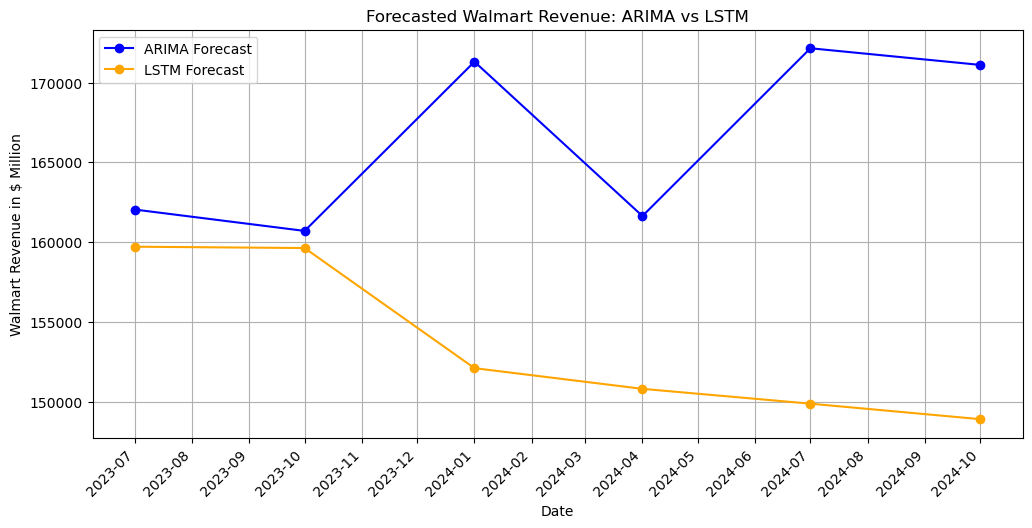

In [89]:
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.dates as mdates
import numpy as np

# Define the exact quarterly dates for the x-axis
quarterly_dates = pd.to_datetime([
    '2023-07-01', '2023-10-01', '2024-01-01', '2024-04-01', '2024-07-01', '2024-10-01'
])

# ARIMA forecast values and corresponding dates
arima_forecast_dates = pd.to_datetime([
    '2023-07-01', '2023-10-01', '2024-01-01', '2024-04-01', '2024-07-01', '2024-10-01'
])
arima_forecast_values = [
    162043.848778, 160706.382597, 171303.735690, 161638.301553, 172145.581776, 171104.027187
]

# LSTM forecast values and corresponding dates
lstm_forecast_dates = pd.to_datetime([
    '2023-09-30', '2023-12-30', '2024-03-30', '2024-06-30', '2024-09-30', '2024-12-30'
])
lstm_forecast_values = [
    159717.609375, 152139.359375, 150835.906250, 149896.640625, 148919.796875, 148533.593750
]

# Function to interpolate LSTM values to match ARIMA dates
def interpolate_forecast(lstm_dates, lstm_values, target_dates):
    return np.interp(
        target_dates.astype(int), 
        lstm_dates.astype(int), 
        lstm_values
    )

# Interpolate LSTM values to align with ARIMA forecast dates
lstm_values_aligned = interpolate_forecast(lstm_forecast_dates, lstm_forecast_values, quarterly_dates)

# Plotting the forecasted values
plt.figure(figsize=(12, 6))

# Plot ARIMA forecasted values
plt.plot(quarterly_dates, arima_forecast_values, label='ARIMA Forecast', marker='o', linestyle='-', color='blue')

# Plot LSTM forecasted values (aligned)
plt.plot(quarterly_dates, lstm_values_aligned, label='LSTM Forecast', marker='o', linestyle='-', color='orange')

# Set the x-axis format and ticks to show all six dates
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=1))
plt.gcf().autofmt_xdate()

# Plot settings
plt.title('Forecasted Walmart Revenue: ARIMA vs LSTM')
plt.xlabel('Date')
plt.ylabel('Walmart Revenue in $ Million')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)

# Display the plot
plt.show()


# HYBRID (ARIMA-LSTM)

/Users/muskaan/anaconda3/lib/python3.11/site-packages/torch/nn/modules/rnn.py:71: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.2 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "


Epoch 1: Validation loss decreased (inf --> 0.026195). Saving model ...
Train_Loss: 0.0027 Val_Loss: 0.0262 BEST VAL Loss: 0.0262

Epoch 2: Validation loss decreased (0.026195 --> 0.001564). Saving model ...
Train_Loss: 0.0979 Val_Loss: 0.0016 BEST VAL Loss: 0.0016

Epoch 3: Validation loss did not decrease
Train_Loss: 0.0056 Val_Loss: 0.0060 BEST VAL Loss: 0.0016

Epoch 4: Validation loss did not decrease
Train_Loss: 0.0064 Val_Loss: 0.0068 BEST VAL Loss: 0.0016

Epoch 5: Validation loss did not decrease
Train_Loss: 0.0107 Val_Loss: 0.0027 BEST VAL Loss: 0.0016

Epoch 6: Validation loss decreased (0.001564 --> 0.001495). Saving model ...
Train_Loss: 0.0068 Val_Loss: 0.0015 BEST VAL Loss: 0.0015

Epoch 7: Validation loss did not decrease
Train_Loss: 0.0031 Val_Loss: 0.0036 BEST VAL Loss: 0.0015

Epoch 8: Validation loss did not decrease
Train_Loss: 0.0015 Val_Loss: 0.0059 BEST VAL Loss: 0.0015

Epoch 9: Validation loss did not decrease
Train_Loss: 0.0016 Val_Loss: 0.0062 BEST VAL Loss:

Epoch 80: Validation loss did not decrease
Train_Loss: 0.0006 Val_Loss: 0.0123 BEST VAL Loss: 0.0011

Epoch 81: Validation loss did not decrease
Train_Loss: 0.0006 Val_Loss: 0.0127 BEST VAL Loss: 0.0011

Epoch 82: Validation loss did not decrease
Train_Loss: 0.0006 Val_Loss: 0.0127 BEST VAL Loss: 0.0011

Epoch 83: Validation loss did not decrease
Train_Loss: 0.0006 Val_Loss: 0.0125 BEST VAL Loss: 0.0011

Epoch 84: Validation loss did not decrease
Train_Loss: 0.0006 Val_Loss: 0.0122 BEST VAL Loss: 0.0011

Epoch 85: Validation loss did not decrease
Train_Loss: 0.0006 Val_Loss: 0.0120 BEST VAL Loss: 0.0011

Epoch 86: Validation loss did not decrease
Train_Loss: 0.0006 Val_Loss: 0.0118 BEST VAL Loss: 0.0011

Epoch 87: Validation loss did not decrease
Train_Loss: 0.0006 Val_Loss: 0.0117 BEST VAL Loss: 0.0011

Epoch 88: Validation loss did not decrease
Train_Loss: 0.0006 Val_Loss: 0.0118 BEST VAL Loss: 0.0011

Epoch 89: Validation loss did not decrease
Train_Loss: 0.0006 Val_Loss: 0.0118 BES

Epoch 173: Validation loss did not decrease
Train_Loss: 0.0004 Val_Loss: 0.0102 BEST VAL Loss: 0.0011

Epoch 174: Validation loss did not decrease
Train_Loss: 0.0004 Val_Loss: 0.0102 BEST VAL Loss: 0.0011

Epoch 175: Validation loss did not decrease
Train_Loss: 0.0004 Val_Loss: 0.0102 BEST VAL Loss: 0.0011

Epoch 176: Validation loss did not decrease
Train_Loss: 0.0004 Val_Loss: 0.0102 BEST VAL Loss: 0.0011

Epoch 177: Validation loss did not decrease
Train_Loss: 0.0004 Val_Loss: 0.0103 BEST VAL Loss: 0.0011

Epoch 178: Validation loss did not decrease
Train_Loss: 0.0004 Val_Loss: 0.0103 BEST VAL Loss: 0.0011

Epoch 179: Validation loss did not decrease
Train_Loss: 0.0004 Val_Loss: 0.0103 BEST VAL Loss: 0.0011

Epoch 180: Validation loss did not decrease
Train_Loss: 0.0004 Val_Loss: 0.0103 BEST VAL Loss: 0.0011

Epoch 181: Validation loss did not decrease
Train_Loss: 0.0004 Val_Loss: 0.0103 BEST VAL Loss: 0.0011

Epoch 182: Validation loss did not decrease
Train_Loss: 0.0004 Val_Loss: 

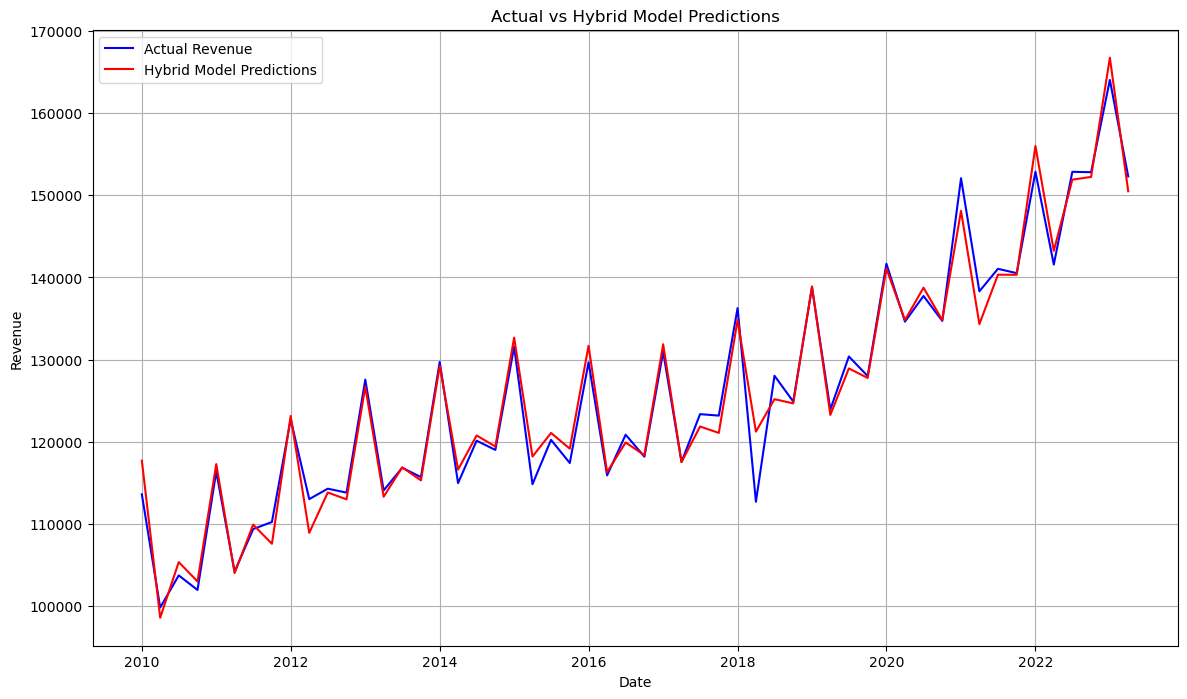

In [113]:
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
from math import sqrt
from pmdarima import auto_arima
import matplotlib.pyplot as plt

# Load data
data_hybrid_test = pd.read_excel('/Users/muskaan/Documents/ARIMA/predicted_exogenous_variables.xlsx')

# Convert 'Year' and 'Quarter' to Date format
data_hybrid_test['Date'] = data_hybrid_test['Year'].astype(str) + ' ' + data_hybrid_test['Quarter']
data_hybrid_test['Date'] = pd.to_datetime(data_hybrid_test['Date'].str.replace('Q1', '01').str.replace('Q2', '04')
                                           .str.replace('Q3', '07').str.replace('Q4', '10'))
data_hybrid_test.set_index('Date', inplace=True)

# Drop the original 'Quarter' and 'Year' columns
data_hybrid_test.drop(columns=['Quarter', 'Year'], inplace=True)

# Drop the 'Percentage of Inflation' column
data_hybrid_test.drop(columns=['Percentage of Inflation'], inplace=True)

# Identify exogenous and target variables
exog_vars = ['GDP in $ Billion', 'Unemployment rate in %', 'Consumer Price Index',
             'Industrial Production', 'House Price Index', 'National Income in Billion']
target_var = 'Walmart Revenue in $ Million'

# Handle missing values by filling them with the mean of the respective column
data_hybrid_test[exog_vars] = data_hybrid_test[exog_vars].fillna(data_hybrid_test[exog_vars].mean())

# Remove rows with NaN values in the target variable
data_hybrid_test.dropna(subset=[target_var], inplace=True)

# Scale Exogenous Variables
scaler_exog = StandardScaler()
data_hybrid_test[exog_vars] = scaler_exog.fit_transform(data_hybrid_test[exog_vars])

# Scale Target Variable (excluding the future values to be predicted)
scaler_target = MinMaxScaler()
data_hybrid_test[target_var] = scaler_target.fit_transform(data_hybrid_test[[target_var]])

# Step 1: Apply ARIMA model
def auto_arima_model(data_frame, output_parameter, exogenous_variables):
    df = data_frame[[output_parameter] + exogenous_variables].copy()

    # Model instance for fitting and predicting
    model = auto_arima(y=df[output_parameter],
                       X=df[exogenous_variables],
                       seasonal=True,
                       suppress_warnings=True,
                       stepwise=True,
                       m=4,
                       max_p=5,
                       max_q=5,
                       d=1,
                       max_order=None)
    
    model.fit(df[output_parameter], X=df[exogenous_variables])
    
    # In-sample prediction for residual calculation
    forecast_in_sample = model.predict_in_sample(X=df[exogenous_variables])
    residuals = df[output_parameter] - forecast_in_sample

    # Predict future values for final combination
    forecast, conf_int = model.predict(n_periods=6, X=df[exogenous_variables].iloc[-6:], return_conf_int=True)
    
    return forecast_in_sample, residuals, forecast

# Apply the ARIMA model
arima_forecast_in_sample, arima_residuals, arima_future_forecast = auto_arima_model(data_hybrid_test, target_var, exog_vars)

# Step 2: Prepare data for LSTM on residuals
def create_lstm_sequences(data, target_var, look_back):
    sequences = []
    targets = []
    for i in range(len(data) - look_back):
        seq = data.iloc[i:(i + look_back)].values
        target = data.iloc[i + look_back][target_var]
        sequences.append(seq)
        targets.append(target)
    return np.array(sequences), np.array(targets)

look_back = 4
data_hybrid_test['Residuals'] = arima_residuals

X, y = create_lstm_sequences(data_hybrid_test[exog_vars + ['Residuals']], 'Residuals', look_back)

split = int(0.8 * len(X))
X_train, X_valid = X[:split], X[split:]
y_train, y_valid = y[:split], y[split:]

X_train = torch.tensor(X_train, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.float32).view(-1, 1)
X_valid = torch.tensor(X_valid, dtype=torch.float32)
y_valid = torch.tensor(y_valid, dtype=torch.float32).view(-1, 1)

class LSTMNet(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, dropout_rate=0.5):
        super(LSTMNet, self).__init__()
        self.hidden_size = hidden_size
        self.num_layers = num_layers
        
        self.lstm = nn.LSTM(input_size=input_size, hidden_size=hidden_size,
                            num_layers=num_layers, batch_first=True, dropout=dropout_rate)
        self.fc = nn.Linear(hidden_size, 1)
        
    def forward(self, x):
        h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(DEVICE)
        c0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(DEVICE)
        out, _ = self.lstm(x, (h0, c0))
        out = self.fc(out[:, -1, :])
        return out

def train_lstm_model(model, X_train, y_train, X_valid, y_valid, learning_rate=0.008, epochs=2000):
    model.to(DEVICE)
    criterion = nn.MSELoss()
    optimizer = optim.Adam(model.parameters(), lr=learning_rate)
    scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', patience=50, factor=0.5, verbose=True)
    
    early_stopping_patience = 150
    early_stopping_counter = 0
    valid_loss_min = np.inf
    
    for epoch in range(epochs):
        optimizer.zero_grad()
        model.train()
        output = model(X_train.to(DEVICE))
        train_loss = criterion(output, y_train.to(DEVICE))
        train_loss.backward()
        optimizer.step()
        
        with torch.no_grad():
            model.eval()
            output_val = model(X_valid.to(DEVICE))
            valid_loss = criterion(output_val, y_valid.to(DEVICE))
    
            scheduler.step(valid_loss)
    
            if valid_loss <= valid_loss_min:
                torch.save(model.state_dict(), './state_dict.pt')
                print(f'Epoch {epoch + 1}: Validation loss decreased ({valid_loss_min:.6f} --> {valid_loss:.6f}). Saving model ...')
                valid_loss_min = valid_loss
                early_stopping_counter = 0  
            else:
                print(f'Epoch {epoch + 1}: Validation loss did not decrease')
                early_stopping_counter += 1
    
            if early_stopping_counter > early_stopping_patience:
                print('Early stopped at epoch:', epoch)
                break
    
            print(f'Train_Loss: {train_loss:.4f} Val_Loss: {valid_loss:.4f} BEST VAL Loss: {valid_loss_min:.4f}\n')

def predict_with_model(model, X):
    model.eval()
    with torch.no_grad():
        X_tensor = torch.tensor(X, dtype=torch.float32).to(DEVICE)
        output = model(X_tensor)
        predictions = output.cpu().numpy()
    return predictions

INPUT_SIZE = X_train.shape[2]
HIDDEN_SIZE = 200
NUM_LAYERS = 1
DROPOUT_RATE = 0.2
LEARNING_RATE = 0.008
EPOCHS = 500

DEVICE = torch.device("cuda" if torch.cuda.is_available() else "cpu")

lstm_model = LSTMNet(input_size=INPUT_SIZE, hidden_size=HIDDEN_SIZE, num_layers=NUM_LAYERS, dropout_rate=DROPOUT_RATE)
train_lstm_model(lstm_model, X_train, y_train, X_valid, y_valid, learning_rate=LEARNING_RATE, epochs=EPOCHS)

lstm_model.load_state_dict(torch.load('./state_dict.pt'))

# Predict using the LSTM model
X_predict, _ = create_lstm_sequences(data_hybrid_test[exog_vars + ['Residuals']], 'Residuals', look_back)
lstm_predictions = predict_with_model(lstm_model, X_predict)

# Combine ARIMA and LSTM Predictions
final_predictions = arima_forecast_in_sample[-len(lstm_predictions):] + lstm_predictions.flatten()
final_predictions_series = pd.Series(final_predictions, index=data_hybrid_test.index[-len(lstm_predictions):], name='Final_Predictions')

# Inverse transform the predictions and actual values if necessary
actual_revenue = scaler_target.inverse_transform(data_hybrid_test[target_var].iloc[-len(lstm_predictions):].values.reshape(-1, 1))
final_predictions_original = scaler_target.inverse_transform(final_predictions_series.values.reshape(-1, 1))

# Calculate metrics for hybrid model
test_rmse_hybrid = sqrt(mean_squared_error(actual_revenue, final_predictions_original))
test_mae_hybrid = mean_absolute_error(actual_revenue, final_predictions_original)
test_mape_hybrid = mean_absolute_percentage_error(actual_revenue, final_predictions_original) * 100

print("Test RMSE (Hybrid):", test_rmse_hybrid)
print("Test MAE (Hybrid):", test_mae_hybrid)
print("Test MAPE (Hybrid):", test_mape_hybrid)

# Plotting the final predictions
plt.figure(figsize=(14, 8))
plt.plot(data_hybrid_test[target_var].iloc[-len(lstm_predictions):].index, actual_revenue, label='Actual Revenue', color='b')
plt.plot(data_hybrid_test[target_var].iloc[-len(lstm_predictions):].index, final_predictions_original, label='Hybrid Model Predictions', color='r')
plt.legend(loc='upper left')
plt.title('Actual vs Hybrid Model Predictions')
plt.xlabel('Date')
plt.ylabel('Revenue')
plt.grid(True)
plt.show()


In [91]:
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from pmdarima import auto_arima
import matplotlib.pyplot as plt

# Define device for PyTorch
DEVICE = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Load data
data_hybrid = pd.read_excel('/Users/muskaan/Documents/ARIMA/predicted_exogenous_variables.xlsx')

# Convert 'Year' and 'Quarter' to Date format
data_hybrid['Date'] = data_hybrid['Year'].astype(str) + ' ' + data_hybrid['Quarter']
data_hybrid['Date'] = pd.to_datetime(data_hybrid['Date'].str.replace('Q1', '01').str.replace('Q2', '04')
                                      .str.replace('Q3', '07').str.replace('Q4', '10'))
data_hybrid.set_index('Date', inplace=True)

# Drop the original 'Quarter' and 'Year' columns
data_hybrid.drop(columns=['Quarter', 'Year'], inplace=True)

# Identify exogenous and target variables
exog_vars = ['GDP in $ Billion', 'Unemployment rate in %', 'Consumer Price Index',
             'Industrial Production', 'House Price Index', 'National Income in Billion']
target_var = 'Walmart Revenue in $ Million'

# Handle missing values in exogenous variables by filling them with the mean of the respective column
data_hybrid[exog_vars] = data_hybrid[exog_vars].fillna(data_hybrid[exog_vars].mean())

# **Only check exogenous variables for NaNs since target can contain expected NaNs**
if data_hybrid[exog_vars].isna().any().any():
    raise ValueError("Exogenous data contains NaN values after filling missing values.")

# Scale Exogenous Variables
scaler_exog = StandardScaler()
data_hybrid[exog_vars] = scaler_exog.fit_transform(data_hybrid[exog_vars])

# Scale Target Variable (ignoring NaNs in the target variable for scaling purposes)
scaler_target = MinMaxScaler()
data_hybrid[target_var] = scaler_target.fit_transform(data_hybrid[[target_var]])

# Step 1: Apply ARIMA model to the available data
def auto_arima_model(data_frame, output_parameter, exogenous_variables):
    df = data_frame[[output_parameter] + exogenous_variables].copy()

    # Ensure no missing values in the output parameter for ARIMA fitting
    df = df.dropna(subset=[output_parameter])
    
    model = auto_arima(y=df[output_parameter],
                       X=df[exogenous_variables].iloc[:len(df[output_parameter])],
                       seasonal=True,
                       suppress_warnings=True,
                       stepwise=True,
                       m=4,
                       max_p=5,
                       max_q=5,
                       d=1,
                       max_order=None)
    
    model.fit(df[output_parameter], X=df[exogenous_variables].iloc[:len(df[output_parameter])])
    
    # In-sample prediction for residual calculation
    forecast_in_sample = model.predict_in_sample(X=df[exogenous_variables])
    residuals = df[output_parameter] - forecast_in_sample

    # Predict future values for the last six quarters
    forecast, conf_int = model.predict(n_periods=6, X=data_frame[exogenous_variables].iloc[-6:], return_conf_int=True)
    
    return forecast_in_sample, residuals, forecast

# Apply the ARIMA model to fit and generate residuals and future forecast
arima_forecast_in_sample, arima_residuals, arima_future_forecast = auto_arima_model(data_hybrid, target_var, exog_vars)

# Step 2: Prepare data for LSTM on residuals
def create_lstm_sequences(data, target_var, look_back):
    sequences = []
    targets = []
    for i in range(len(data) - look_back):
        seq = data.iloc[i:(i + look_back)].values
        target = data.iloc[i + look_back][target_var]
        sequences.append(seq)
        targets.append(target)
    return np.array(sequences), np.array(targets)

look_back = 4
data_hybrid['Residuals'] = np.nan
data_hybrid['Residuals'].iloc[:len(arima_residuals)] = arima_residuals

# Ensure there are no NaNs in the residuals used for training
data_hybrid['Residuals'] = data_hybrid['Residuals'].fillna(0)

# Prepare sequences for LSTM
X, y = create_lstm_sequences(data_hybrid[exog_vars + ['Residuals']], 'Residuals', look_back)

# Split data into training and validation sets
split = int(0.8 * len(X))
X_train, X_valid = X[:split], X[split:]
y_train, y_valid = y[:split], y[split:]

X_train = torch.tensor(X_train, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.float32).view(-1, 1)
X_valid = torch.tensor(X_valid, dtype=torch.float32)
y_valid = torch.tensor(y_valid, dtype=torch.float32).view(-1, 1)

# Define LSTM model
class LSTMNet(nn.Module):
    def __init__(self, input_size, hidden_size=128, num_layers=2, dropout_rate=0.3):
        super(LSTMNet, self).__init__()
        self.hidden_size = hidden_size
        self.num_layers = num_layers
        
        # LSTM Layer
        self.lstm = nn.LSTM(input_size=input_size, hidden_size=hidden_size,
                            num_layers=num_layers, batch_first=True, dropout=dropout_rate)
        
        # Fully connected layers
        self.fc1 = nn.Linear(hidden_size, 64)  # First FC layer
        self.fc2 = nn.Linear(64, 1)  # Second FC layer
        
    def forward(self, x):
        h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(DEVICE)
        c0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(DEVICE)
        
        out, _ = self.lstm(x, (h0, c0))
        out = self.fc1(out[:, -1, :])  # Pass through first FC layer
        out = self.fc2(out)  # Pass through second FC layer
        return out

# Initialize the model for training
INPUT_SIZE = X_train.shape[2]  # Number of input features (Exogenous variables + residuals)
HIDDEN_SIZE = 128
NUM_LAYERS = 2
DROPOUT_RATE = 0.3

# Initialize the model
lstm_model = LSTMNet(input_size=INPUT_SIZE, hidden_size=HIDDEN_SIZE, num_layers=NUM_LAYERS, dropout_rate=DROPOUT_RATE)

# Define the training function
def train_lstm_model(model, X_train, y_train, X_valid, y_valid, learning_rate=0.001, epochs=2000):
    model.to(DEVICE)
    criterion = nn.MSELoss()
    optimizer = optim.Adam(model.parameters(), lr=learning_rate)
    scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', patience=50, factor=0.5, verbose=True)
    
    early_stopping_patience = 150
    early_stopping_counter = 0
    valid_loss_min = np.inf
    
    for epoch in range(epochs):
        model.train()
        optimizer.zero_grad()
        output = model(X_train.to(DEVICE))
        train_loss = criterion(output, y_train.to(DEVICE))
        train_loss.backward()
        
        # Apply gradient clipping
        torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)
        
        optimizer.step()
    
        with torch.no_grad():
            model.eval()
            output_val = model(X_valid.to(DEVICE))
            valid_loss = criterion(output_val, y_valid.to(DEVICE))
            
            if np.isnan(valid_loss.item()) or np.isinf(valid_loss.item()):
                print(f'Epoch {epoch + 1}: Validation loss is NaN or Inf')
                continue
    
            scheduler.step(valid_loss)
    
            if valid_loss <= valid_loss_min:
                torch.save(model.state_dict(), './state_dict.pt')
                print(f'Epoch {epoch + 1}: Validation loss decreased ({valid_loss_min:.6f} --> {valid_loss:.6f}). Saving model ...')
                valid_loss_min = valid_loss
                early_stopping_counter = 0  
            else:
                early_stopping_counter += 1
    
            if early_stopping_counter > early_stopping_patience:
                print('Early stopped at epoch:', epoch)
                break
    
            print(f'Train_Loss: {train_loss:.4f}, Valid_Loss: {valid_loss:.4f}')

# Train the LSTM model
train_lstm_model(lstm_model, X_train, y_train, X_valid, y_valid)

# Reload the model and make predictions
lstm_model.load_state_dict(torch.load('./state_dict.pt'))
lstm_model.to(DEVICE)

# Define prediction function
def predict_with_model(model, X):
    model.eval()
    with torch.no_grad():
        X = torch.tensor(X, dtype=torch.float32).to(DEVICE)
        predictions = model(X)
        predictions = predictions.cpu().numpy()
    
    return predictions

# Step 3: Predict residuals for the last 6 quarters
X_predict, _ = create_lstm_sequences(data_hybrid[exog_vars + ['Residuals']], 'Residuals', look_back)
lstm_predictions = predict_with_model(lstm_model, X_predict[-6:])

# Step 4: Combine ARIMA and LSTM Predictions
final_predictions = arima_future_forecast + lstm_predictions.flatten()
final_predictions = np.nan_to_num(final_predictions)  # Ensure no NaNs
final_predictions_series = pd.Series(final_predictions, index=data_hybrid.index[-6:], name='Final_Predictions')

# Inverse scale the predictions
final_predictions_inverse = scaler_target.inverse_transform(final_predictions_series.values.reshape(-1, 1))

# Prepare the output
forecasted_values = pd.DataFrame({
    "Date": data_hybrid.index[-6:],
    "Forecasted Walmart Revenue ($ Million)": final_predictions_inverse.flatten()
})

print(forecasted_values)




Epoch 1: Validation loss decreased (inf --> 0.000375). Saving model ...
Train_Loss: 0.0026, Valid_Loss: 0.0004
Train_Loss: 0.0010, Valid_Loss: 0.0007
Train_Loss: 0.0017, Valid_Loss: 0.0008
Train_Loss: 0.0017, Valid_Loss: 0.0005
Train_Loss: 0.0012, Valid_Loss: 0.0004
Train_Loss: 0.0009, Valid_Loss: 0.0004
Train_Loss: 0.0011, Valid_Loss: 0.0004
Train_Loss: 0.0012, Valid_Loss: 0.0004
Epoch 9: Validation loss decreased (0.000375 --> 0.000361). Saving model ...
Train_Loss: 0.0012, Valid_Loss: 0.0004
Train_Loss: 0.0011, Valid_Loss: 0.0004
Train_Loss: 0.0010, Valid_Loss: 0.0005
Train_Loss: 0.0008, Valid_Loss: 0.0007
Train_Loss: 0.0009, Valid_Loss: 0.0009
Train_Loss: 0.0010, Valid_Loss: 0.0010
Train_Loss: 0.0010, Valid_Loss: 0.0010
Train_Loss: 0.0010, Valid_Loss: 0.0009
Train_Loss: 0.0009, Valid_Loss: 0.0008
Train_Loss: 0.0009, Valid_Loss: 0.0007
Train_Loss: 0.0009, Valid_Loss: 0.0006
Train_Loss: 0.0009, Valid_Loss: 0.0005
Train_Loss: 0.0009, Valid_Loss: 0.0005
Train_Loss: 0.0009, Valid_Loss: 

# COMPARISON


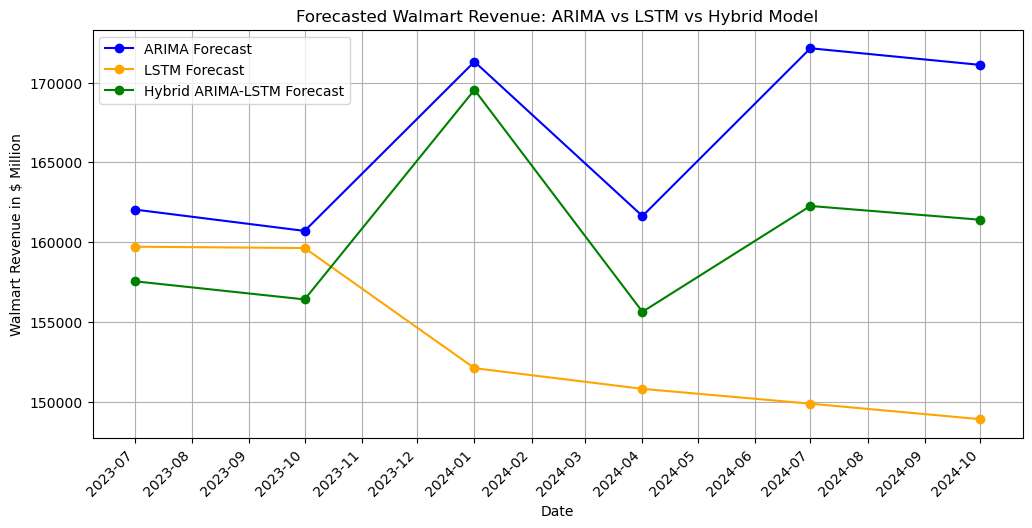

In [92]:
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.dates as mdates
import numpy as np

# Define the exact quarterly dates for the x-axis
quarterly_dates = pd.to_datetime([
    '2023-07-01', '2023-10-01', '2024-01-01', '2024-04-01', '2024-07-01', '2024-10-01'
])

# ARIMA forecast values and corresponding dates
arima_forecast_dates = pd.to_datetime([
    '2023-07-01', '2023-10-01', '2024-01-01', '2024-04-01', '2024-07-01', '2024-10-01'
])
arima_forecast_values = [
    162043.848778, 160706.382597, 171303.735690, 161638.301553, 172145.581776, 171104.027187
]

# LSTM forecast values and corresponding dates
lstm_forecast_dates = pd.to_datetime([
    '2023-09-30', '2023-12-30', '2024-03-30', '2024-06-30', '2024-09-30', '2024-12-30'
])
lstm_forecast_values = [
    159717.609375, 152139.359375, 150835.906250, 149896.640625, 148919.796875, 148533.593750
]

# Hybrid forecast values and corresponding dates
hybrid_forecast_dates = pd.to_datetime([
    '2023-07-01', '2023-10-01', '2024-01-01', '2024-04-01', '2024-07-01', '2024-10-01'
])
hybrid_forecast_values = [
    157551.828183, 156416.250469, 169540.636871, 155641.082110, 162268.220774, 161405.964306
]

# Function to interpolate LSTM values to match ARIMA dates
def interpolate_forecast(lstm_dates, lstm_values, target_dates):
    return np.interp(
        target_dates.astype(int), 
        lstm_dates.astype(int), 
        lstm_values
    )

# Interpolate LSTM values to align with ARIMA forecast dates
lstm_values_aligned = interpolate_forecast(lstm_forecast_dates, lstm_forecast_values, quarterly_dates)

# Plotting the forecasted values
plt.figure(figsize=(12, 6))

# Plot ARIMA forecasted values
plt.plot(quarterly_dates, arima_forecast_values, label='ARIMA Forecast', marker='o', linestyle='-', color='blue')

# Plot LSTM forecasted values (aligned)
plt.plot(quarterly_dates, lstm_values_aligned, label='LSTM Forecast', marker='o', linestyle='-', color='orange')

# Plot Hybrid model forecasted values
plt.plot(hybrid_forecast_dates, hybrid_forecast_values, label='Hybrid ARIMA-LSTM Forecast', marker='o', linestyle='-', color='green')

# Set the x-axis format and ticks to show all six dates
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=1))
plt.gcf().autofmt_xdate()

# Plot settings
plt.title('Forecasted Walmart Revenue: ARIMA vs LSTM vs Hybrid Model')
plt.xlabel('Date')
plt.ylabel('Walmart Revenue in $ Million')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)

# Display the plot
plt.show()


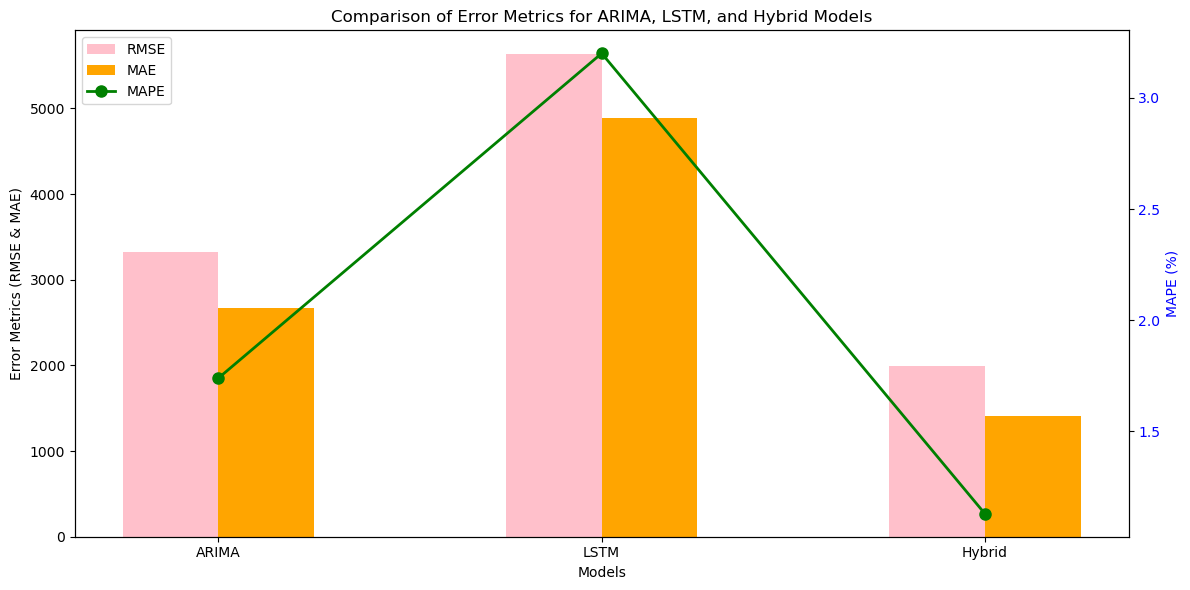

In [110]:
import matplotlib.pyplot as plt
import numpy as np

# Metrics for each model
models = ['ARIMA', 'LSTM', 'Hybrid']
rmse = [3325.92, 5630.99, 1991.57]
mae = [2669.36, 4889.66, 1407.86]
mape = [1.74, 3.20, 1.13]

x = np.arange(len(models))  # The label locations
width = 0.25  # The width of the bars

fig, ax1 = plt.subplots(figsize=(12, 6))

# Bar plot for RMSE and MAE
rects1 = ax1.bar(x - width/2, rmse, width, label='RMSE', color='pink')
rects2 = ax1.bar(x + width/2, mae, width, label='MAE', color='orange')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax1.set_xlabel('Models')
ax1.set_ylabel('Error Metrics (RMSE & MAE)')
ax1.set_title('Comparison of Error Metrics for ARIMA, LSTM, and Hybrid Models')
ax1.set_xticks(x)
ax1.set_xticklabels(models)
ax1.legend(loc='upper left')

# Create a second y-axis for MAPE
ax2 = ax1.twinx()
ax2.plot(x, mape, 'g-o', label='MAPE', linewidth=2, markersize=8)
ax2.set_ylabel('MAPE (%)', color='b')
ax2.tick_params(axis='y', labelcolor='b')

# Add the legend for MAPE
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines + lines2, labels + labels2, loc='upper left')

fig.tight_layout()

plt.show()


In [104]:
import pandas as pd

# Create a DataFrame for the metrics
metrics_data = {
    'Model': ['ARIMA', 'LSTM', 'Hybrid'],
    'RMSE': [3325.92, 5536.80, 1991.57],
    'MAE': [2669.36, 4792.69, 1407.86],
    'MAPE (%)': [1.74, 3.14, 1.13]
}

metrics_df = pd.DataFrame(metrics_data)
print(metrics_df)


    Model     RMSE      MAE  MAPE (%)
0   ARIMA  3325.92  2669.36      1.74
1    LSTM  5536.80  4792.69      3.14
2  Hybrid  1991.57  1407.86      1.13


In [1]:
pip install nbconvert

Note: you may need to restart the kernel to use updated packages.
